### <h1><b>Labnostic Diabetes Prediction Tool</b></h1>

### <h3>Life Cycle of this Machine Learning Project</h3>

<li>Understand the Problem Statement
<li>Data Collection
<li>Data Checks to perform
<li>Exploratory Data Analysis
<li>Data Pre-processing
<li>Model Training
<li>Model Evaluation
<li>Selection of Best Performing Model

<h3> 1) Problem Statement </h3>

<li>The project aims to investigate the influence of various factors on the development of diabetes. Specifically, it will analyze how key variables like cholesterol levels, age, urea, creatinine, triglycerides, HbA1c, and other biological factors correlate with diabetes onset and progression.

<h3> 2) Data Collection </h3>

<li>Dataset Source - https://data.mendeley.com/datasets/wj9rwkp9c2/1
<li>The data contains 14 columns, and 1000 rows.

<h4> 2.1) Import Data and Required Packages </h4>

Importing Pandas, Matplotlib, and Seaborn Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# import utils 
import sys
sys.path.append('..')
from src.utils import vizSampling
from src.utils import vizScaling
from src.logger import logging

Importing CSV Data as a Pandas DataFrame

In [4]:
data = pd.read_csv('data/diabetes1.csv')

View Top 5 Records

In [5]:
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


<h4> 2.2) Dataset Information </h4>

<li>ID: Unique id of patient
<li>No_Pation: Unique patient number
<li>Gender: Gender of patient
<li>Age: Age of patient
<li>Urea
<li>Cr: Creatinine ratio
<li>HbA1c: Hemoglobin A1c
<li>Chol: Cholesterol
<li>TG: Triglycerides
<li>HDL: High-Density Lipo-protein
<li>LDL: Low-Density Lipo-protein
<li>VLDL: Very Low-Density Lipo-protein
<li>BMI: Body Mass Index
<li>Class: Target Feature

<h3> 3) Data Checks </h3>

<li>Check Missing and 0 Values
<li>Check Duplicate Values
<li>Check Data Type
<li>Check number of unique values of each column
<li>Check unique values of categorical columns
<li>Check statistics of the dataset
<li>Check for categories present in categorical column

<h4> 3.1) Check for Missing and 0 Values </h4>

In [6]:
data.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

There are no Missing Values found

In [7]:
data.eq(0).sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         1
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

Found an outlier in 'Chol' column, proceeding for imputation of that row

In [8]:
outlier_Chol = data[data['Chol'] == 0]
data.drop(outlier_Chol.index, inplace=True)
data.eq(0).sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

<h4> 3.2) Check for Duplicate Values </h4>

In [9]:
data.duplicated().sum()

0

<h4> 3.3) Check for Data Types </h4>

In [10]:
# check null and data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         999 non-null    int64  
 1   No_Pation  999 non-null    int64  
 2   Gender     999 non-null    object 
 3   AGE        999 non-null    int64  
 4   Urea       999 non-null    float64
 5   Cr         999 non-null    int64  
 6   HbA1c      999 non-null    float64
 7   Chol       999 non-null    float64
 8   TG         999 non-null    float64
 9   HDL        999 non-null    float64
 10  LDL        999 non-null    float64
 11  VLDL       999 non-null    float64
 12  BMI        999 non-null    float64
 13  CLASS      999 non-null    object 
dtypes: float64(8), int64(4), object(2)
memory usage: 117.1+ KB


<h4> 3.4) Check for Number of Unique Values </h4>

In [11]:
data.nunique()

ID           800
No_Pation    961
Gender         3
AGE           50
Urea         110
Cr           113
HbA1c        111
Chol          76
TG            69
HDL           48
LDL           65
VLDL          60
BMI           64
CLASS          5
dtype: int64

<h4> 3.5) Check for Unique Values of Categorical Columns</h4>

In [12]:
# view unique values of each categorical feature
cat_cols = [col for col in data.columns if col in ['Gender', 'CLASS']]

for col in cat_cols:
    unique_val = data[col].unique()
    print(f"Unique values in '{col}': '{unique_val}'")


Unique values in 'Gender': '['F' 'M' 'f']'
Unique values in 'CLASS': '['N' 'N ' 'P' 'Y' 'Y ']'


Pre-process 'Gender' and 'CLASS' columns

In [13]:
data['Gender'] = data['Gender'].replace({'F': 1, 'f': 1, 'M': 0})
data['CLASS'] = data['CLASS'].replace({'N ': 'N', 'Y ': 'Y'})

for col in cat_cols:
    unique_val = data[col].unique()
    print(f"Unique values in '{col}': '{unique_val}'")

Unique values in 'Gender': '[1 0]'
Unique values in 'CLASS': '['N' 'P' 'Y']'


C:\Users\Admin\AppData\Local\Temp\ipykernel_17148\1313017657.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'F': 1, 'f': 1, 'M': 0})


<h4> 3.6) Check for Statistics of the Dataset </h4>

In [14]:
data.describe()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,340.654655,2.703675e+05,0.435435,53.504505,5.124868,68.905906,8.284044,4.867688,2.349159,1.205155,2.610601,1.855856,29.588609
std,240.468305,3.382446e+06,0.496062,8.772208,2.936633,60.003316,2.533630,1.293252,1.401805,0.660620,1.115365,3.665252,4.953558
min,1.000000,1.230000e+02,0.000000,20.000000,0.500000,6.000000,0.900000,0.500000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.500000,2.406350e+04,0.000000,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,301.000000,3.439500e+04,0.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.500000,4.538350e+04,1.000000,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


Insight
<li>The means of the numerical features vary significantly across different variables, indicating a lack of consistency in their ranges. This suggests the need for normalization or standardization before further analysis.
<li>The standard deviation across the numerical features shows significant variance. This indicates inconsistency in the spread of data among these features.
<li>The numerical features show a wide range of minimum and maximum values, indicating significant variation across variables. Additional preprocessing is necessary to reduce these gaps for more consistent data analysis.

<h3> 4) Exploring Data (Visualization) </h3>

<h4> 4.1) Visualize Distribution of the 'CLASS' column </h4>

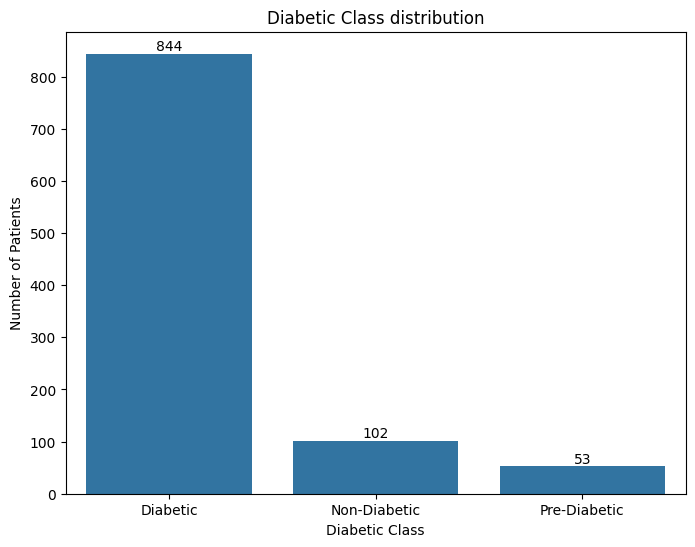

In [15]:
class_dist = data['CLASS'].value_counts()
class_dist = class_dist.rename({"Y":"Diabetic", "P":"Pre-Diabetic", "N":"Non-Diabetic"})

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title("Diabetic Class distribution")
plt.ylabel("Number of Patients")
plt.xlabel("Diabetic Class")

for i in ax.containers:
    ax.bar_label(i,)

<h5>Insight</h5>
<li>Since there is a huge imbalance in the 'CLASS' column, sampling method should be applied.

<h4> 4.2) Visualize Diabetic Patient's Age Distribution</h4>

Text(0.5, 0, 'Age')

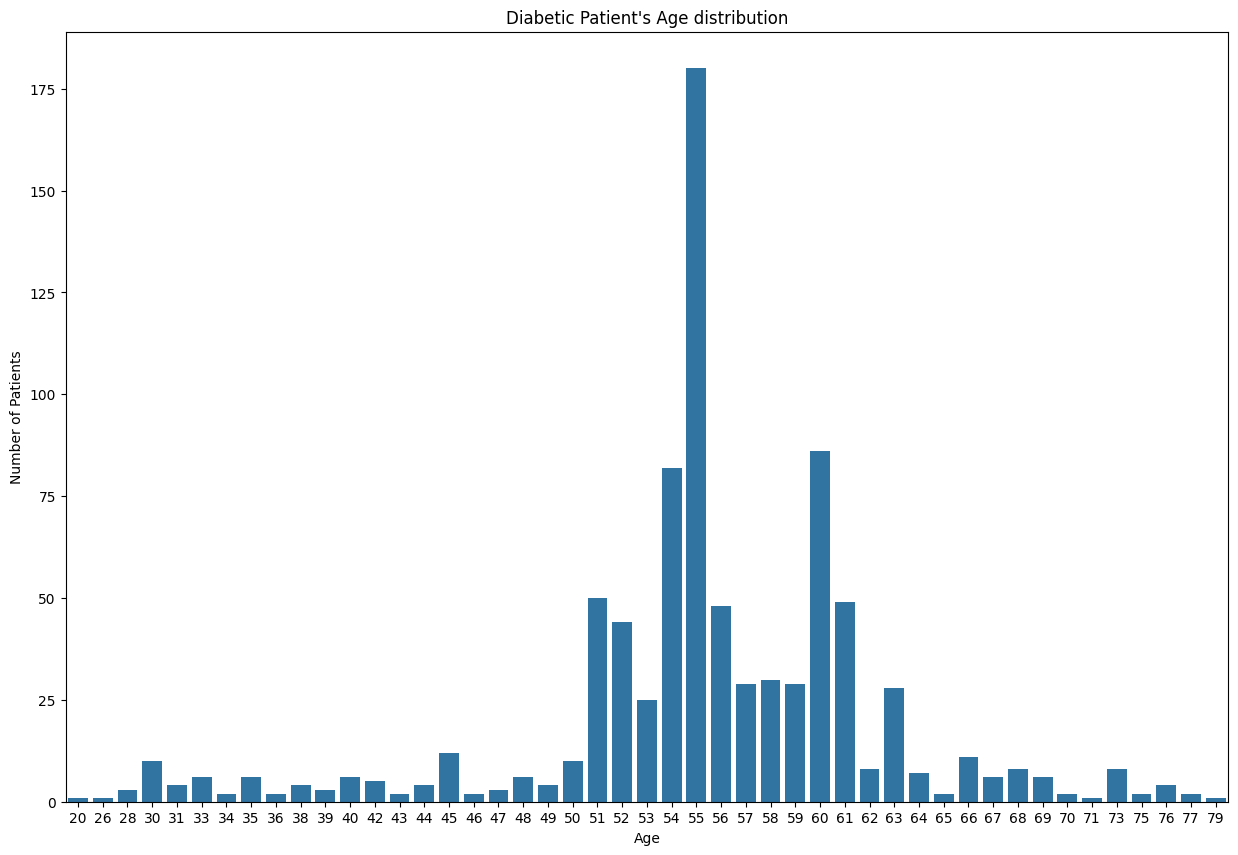

In [16]:
diabetic_patients = data.loc[data['CLASS'] == 'Y']
age_count = diabetic_patients['AGE'].value_counts().sort_index()

plt.figure(figsize=(15,10))
ax = sns.barplot(x=age_count.index, y=age_count.values)
plt.title("Diabetic Patient's Age distribution")
plt.ylabel("Number of Patients")
plt.xlabel("Age")

<h5>Insight</h5>
<li>Most Patients who are diabetic fall in the Age range of 51-61.

<h4> 4.3) Visualize Non-Diabetic Patient's Age Distribution</h4>

Text(0.5, 0, 'Age')

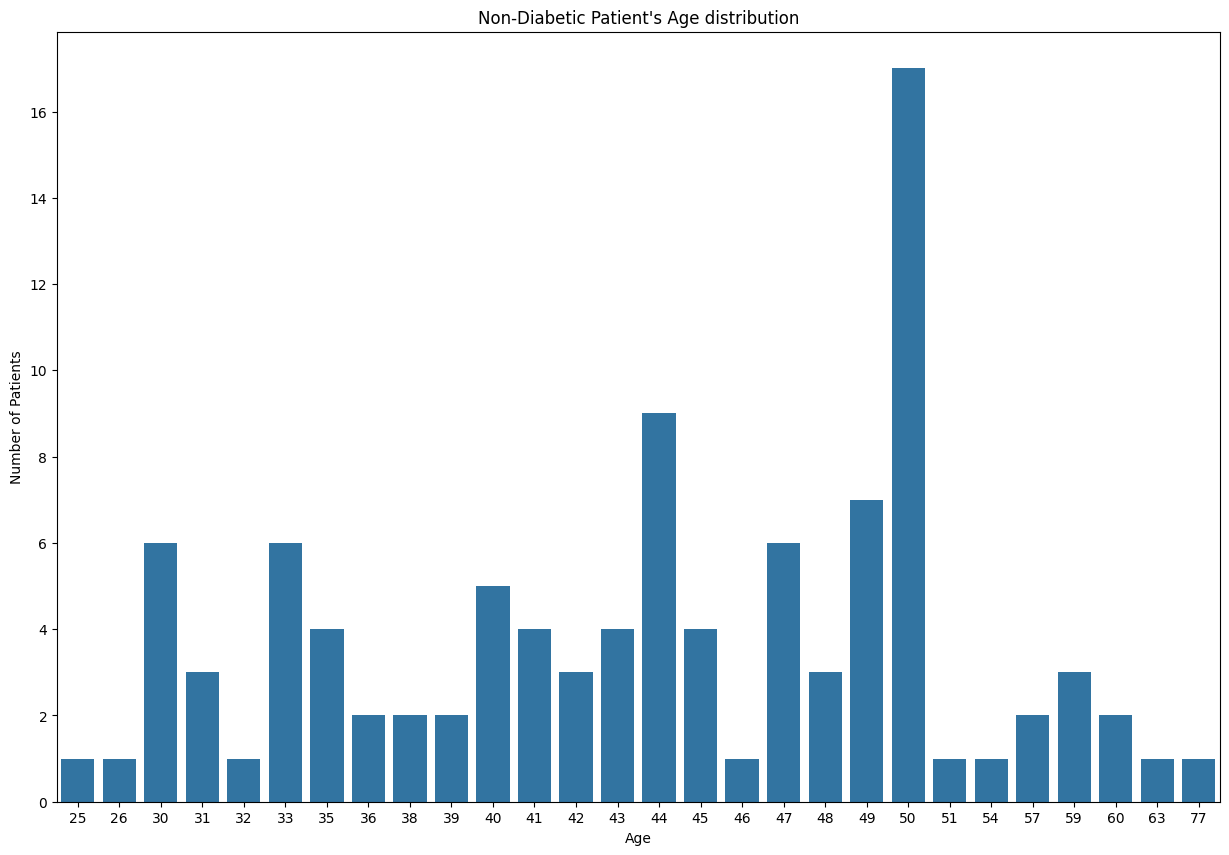

In [17]:
non_diabetic_patients = data.loc[data['CLASS'] == 'N']
age_count = non_diabetic_patients['AGE'].value_counts().sort_index()

plt.figure(figsize=(15,10))
ax = sns.barplot(x=age_count.index, y=age_count.values)
plt.title("Non-Diabetic Patient's Age distribution")
plt.ylabel("Number of Patients")
plt.xlabel("Age")

<h5>Insight</h5>
<li>Most Patients who are non-diabetic has an Age of <50.

<h4> 4.4) Visualize Pre-Diabetic Patient's Age Distribution</h4>

Text(0.5, 0, 'Age')

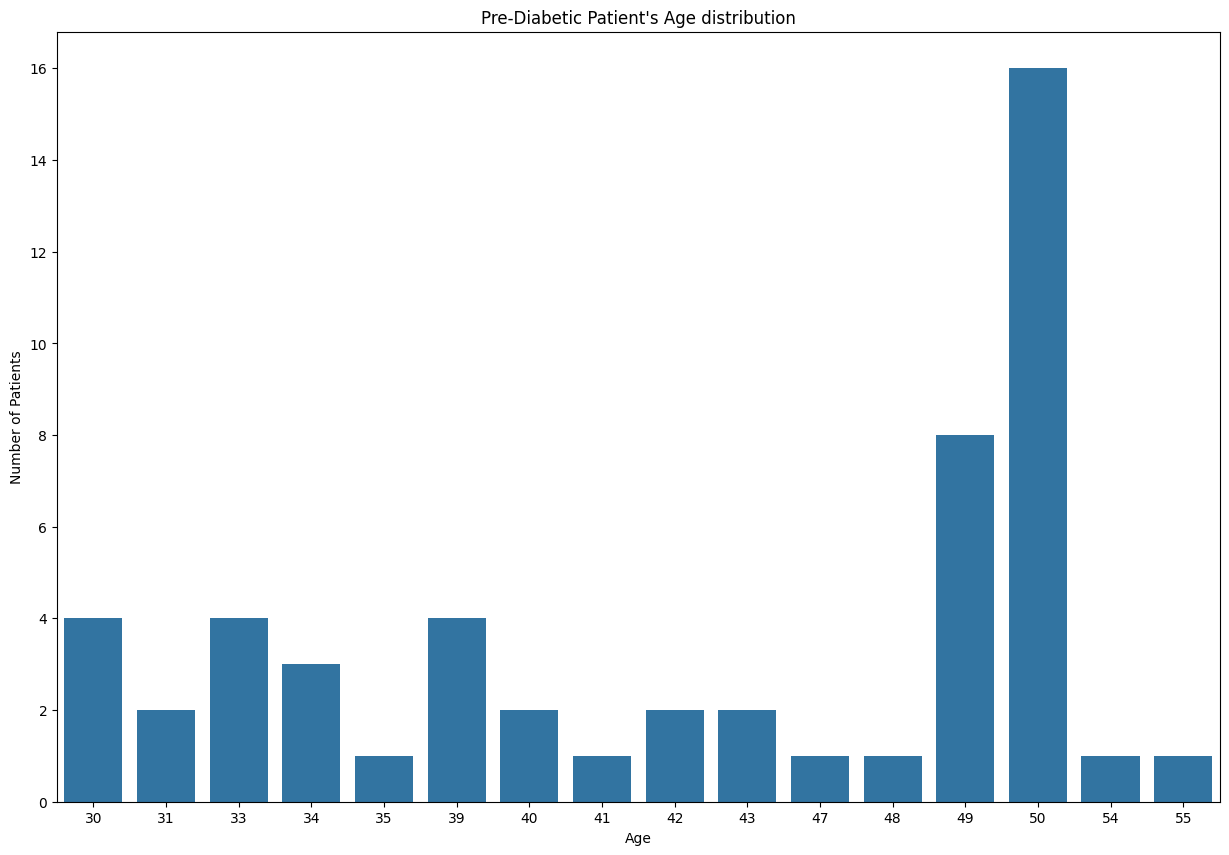

In [18]:
pre_diabetic_patients = data.loc[data['CLASS'] == 'P']
age_count = pre_diabetic_patients['AGE'].value_counts().sort_index()

plt.figure(figsize=(15,10))
ax = sns.barplot(x=age_count.index, y=age_count.values)
plt.title("Pre-Diabetic Patient's Age distribution")
plt.ylabel("Number of Patients")
plt.xlabel("Age")

<h5>Insight</h5>
<li>Most Patients who are pre-diabetic falls in the Age range of 30-55.

<h4> 4.5) Visualize Correlation of Variables using Heatmap</h4>

Unique Class Values: [0 1 2]


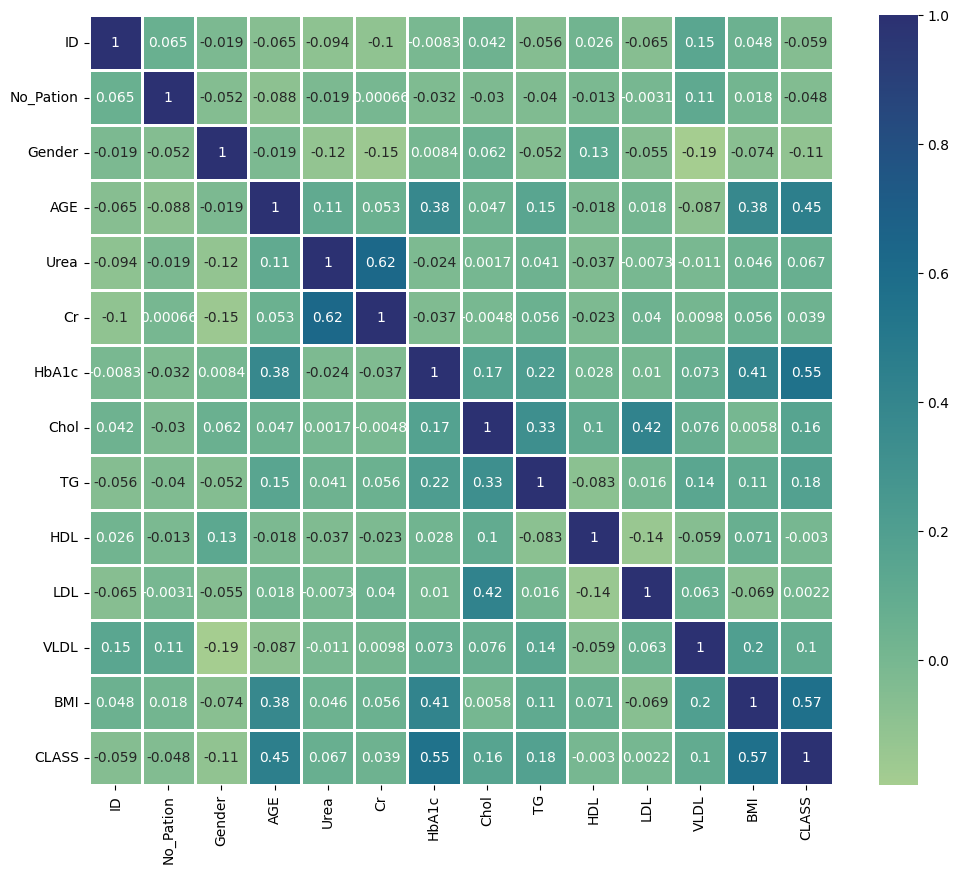

In [19]:
# apply label encode first to 'CLASS' col before correlation analysis
labelEncoder = LabelEncoder()

# create a copy of the data
le_data = data.copy()

# apply label encoding
le_data['CLASS'] = labelEncoder.fit_transform(le_data['CLASS'])

# view 'CLASS' col
print(f"Unique Class Values: {le_data['CLASS'].unique()}")

# performing correlation analysis
plt.figure(figsize=(12,10))

heatmap = sns.heatmap(le_data.corr(), annot=True, cmap='crest', linewidths=2.1)

<h5>Insight</h5>
<li>Since 'ID' and 'No_Pation' cols shows no significant correlation with other
features and the target feature, these cols will be dropped

In [20]:
# dropping 'ID' and 'No_Pation' cols
le_data = le_data.drop(['ID', 'No_Pation'], axis=1)
le_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  999 non-null    int64  
 1   AGE     999 non-null    int64  
 2   Urea    999 non-null    float64
 3   Cr      999 non-null    int64  
 4   HbA1c   999 non-null    float64
 5   Chol    999 non-null    float64
 6   TG      999 non-null    float64
 7   HDL     999 non-null    float64
 8   LDL     999 non-null    float64
 9   VLDL    999 non-null    float64
 10  BMI     999 non-null    float64
 11  CLASS   999 non-null    int32  
dtypes: float64(8), int32(1), int64(3)
memory usage: 97.6 KB


<h3> 5) Data Pre-processing </h3>

<h4> 5.1) Creating Train and Test Dataset</h4>

In [21]:
 # selecting x and y features from LE_data, then apply splits
X = le_data.iloc[:, 0:11]
y = le_data.iloc[:, 11:]

x_train_le, x_test_le, y_train_le, y_test_le = train_test_split(X, y, test_size=0.2, random_state=60, stratify=y)
train_le_data = pd.concat([x_train_le, y_train_le], axis=1)
train_le_data.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,0.438048,53.668335,5.127297,68.942428,8.297822,4.892240,2.349061,1.191877,2.628598,1.751690,29.519174,1.742178
std,0.496458,8.692686,3.008519,63.573861,2.559055,1.304192,1.358166,0.514210,1.140701,3.457369,4.831564,0.630162
min,0.000000,20.000000,0.500000,6.000000,0.900000,0.500000,0.300000,0.200000,0.500000,0.100000,19.000000,0.000000
25%,0.000000,51.000000,3.600000,48.000000,6.500000,4.100000,1.500000,0.900000,1.800000,0.700000,26.000000,2.000000
50%,0.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,2.000000
75%,1.000000,59.000000,5.700000,72.500000,10.200000,5.600000,2.900000,1.300000,3.300000,1.400000,33.000000,2.000000
max,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,12.700000,6.600000,9.900000,35.000000,47.750000,2.000000


In [22]:
test_le_data = pd.concat([x_test_le, y_test_le], axis=1)
test_le_data.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.425000,52.850000,5.115165,68.760000,8.229000,4.769600,2.349550,1.258200,2.538700,2.272000,29.866000,1.745000
std,0.495584,9.075756,2.636900,43.000905,2.434851,1.246941,1.567775,1.060581,1.007265,4.384236,5.417682,0.626047
min,0.000000,28.000000,1.100000,20.000000,0.900000,1.200000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,50.000000,3.800000,51.750000,6.650000,3.900000,1.400000,0.900000,1.700000,0.700000,26.000000,2.000000
50%,0.000000,55.000000,4.600000,61.000000,8.000000,4.650000,2.000000,1.000000,2.600000,1.000000,30.000000,2.000000
75%,1.000000,58.000000,5.615000,75.250000,10.200000,5.500000,2.800000,1.300000,3.200000,1.600000,33.000000,2.000000
max,1.000000,77.000000,24.000000,401.000000,14.400000,9.700000,13.800000,9.900000,5.600000,31.800000,47.000000,2.000000


In [23]:
y_train_le.describe()

,CLASS
count,799.000000
mean,1.742178
std,0.630162
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


<h4> 5.2) Handling Class Imbalances</h4>

In [24]:
# apply SMOTE sampling method
smote = SMOTE(random_state=63)

x_train_smote_le, y_train_smote_le = smote.fit_resample(x_train_le, y_train_le)

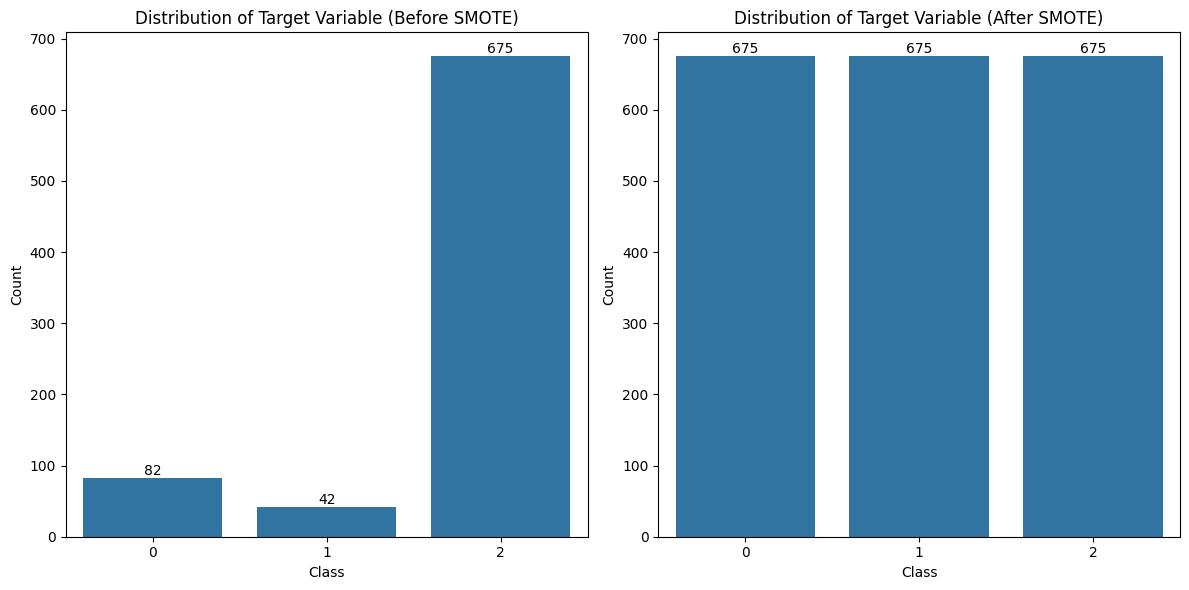

In [25]:
# visualize before and after sampling
vizSampling(y_train_smote_le, y_train_le, 'SMOTE')

In [26]:
train_smote_le = pd.concat([x_train_smote_le, y_train_smote_le], axis=1)
train_smote_le.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000
mean,0.328395,47.676049,4.743882,64.223704,6.489897,4.604641,2.044922,1.201126,2.598564,1.246800,25.739427,1.000000
std,0.469745,9.378500,2.394487,45.347482,2.276327,1.074189,1.109373,0.440030,0.907945,2.267436,4.530773,0.816698
min,0.000000,20.000000,0.500000,6.000000,0.900000,0.500000,0.300000,0.200000,0.500000,0.100000,19.000000,0.000000
25%,0.000000,42.000000,3.571686,48.000000,5.000000,4.000000,1.300000,0.932520,1.925692,0.668804,22.500000,0.000000
50%,0.000000,49.000000,4.355003,57.000000,6.000000,4.492801,1.795247,1.100000,2.537134,0.842764,24.107752,1.000000
75%,1.000000,54.000000,5.260309,70.000000,7.200000,5.078094,2.354819,1.330680,3.100000,1.120063,28.000000,2.000000
max,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,12.700000,6.600000,9.900000,35.000000,47.750000,2.000000


In [27]:
train_smote_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  2025 non-null   int64  
 1   AGE     2025 non-null   int64  
 2   Urea    2025 non-null   float64
 3   Cr      2025 non-null   int64  
 4   HbA1c   2025 non-null   float64
 5   Chol    2025 non-null   float64
 6   TG      2025 non-null   float64
 7   HDL     2025 non-null   float64
 8   LDL     2025 non-null   float64
 9   VLDL    2025 non-null   float64
 10  BMI     2025 non-null   float64
 11  CLASS   2025 non-null   int32  
dtypes: float64(8), int32(1), int64(3)
memory usage: 182.1 KB


<h5>Insight</h5>
<li>'CLASS' column has been sampled using SMOTE, and now have a balance distribution of categories.

<h4> 5.3) Handling Inconsistent Range Values</h4>

In [28]:
# apply normalization to convert column values to comparable ranges
from sklearn import preprocessing

standardScaler = preprocessing.StandardScaler()

# exclude 'Gender' and 'AGE' cols in scaling
smote_gender_age = x_train_smote_le.iloc[:, 0:2]
cont_col = x_train_smote_le.iloc[:, 2:]

# perform scaling
st_train_smote_le = standardScaler.fit_transform(cont_col)

# convert st_train_smote_le from numpy array to pandas dataframe
st_train_smote_le = pd.DataFrame(st_train_smote_le, columns=cont_col.columns)

# merge st_train_smote_le and smote_gender_age
st_train_smote_le = pd.concat([st_train_smote_le, smote_gender_age], axis=1)

st_train_smote_le.describe()

,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender,AGE
count,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2025.000000,2025.000000
mean,1.543895e-16,-2.807082e-17,1.964958e-16,-2.526374e-16,1.894781e-16,2.390406e-16,3.210601e-16,1.403541e-17,-3.649207e-16,0.328395,47.676049
std,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,0.469745,9.378500
min,-1.772793e+00,-1.284263e+00,-2.456272e+00,-3.822096e+00,-1.573279e+00,-2.275692e+00,-2.311904e+00,-5.058942e-01,-1.487846e+00,0.000000,20.000000
25%,-4.896607e-01,-3.578525e-01,-6.546798e-01,-5.630202e-01,-6.716463e-01,-6.105753e-01,-7.412755e-01,-2.549745e-01,-7.151598e-01,0.000000,42.000000
50%,-1.624460e-01,-1.593360e-01,-2.152671e-01,-1.041411e-01,-2.251149e-01,-2.298718e-01,-6.767443e-02,-1.782344e-01,-3.602205e-01,0.000000,49.000000
75%,2.157268e-01,1.274100e-01,3.120280e-01,4.408625e-01,2.794137e-01,2.944956e-01,5.524125e-01,-5.590818e-02,4.990609e-01,1.000000,54.000000
max,1.426801e+01,1.622930e+01,4.178859e+00,5.303315e+00,9.606969e+00,1.227236e+01,8.043702e+00,1.488974e+01,4.859217e+00,1.000000,79.000000


In [29]:
st_train_smote_le.head()

,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender,AGE
0,6.707109,16.229303,1.102971,-2.146000,-0.851973,-0.684499,-1.871240,-0.329440,1.602898,0,60
1,0.399398,-0.247566,-0.215267,0.740610,-0.310993,0.452068,0.772745,-0.241213,-0.825544,1,30
2,0.274080,-0.181393,0.619617,0.275028,0.049660,-0.229872,-0.108584,-0.152986,0.499061,0,52
3,0.357625,-0.401967,1.146912,0.926843,3.385702,0.906695,-0.989912,-0.108872,2.044433,1,56
4,-0.394287,-0.313738,1.366618,1.019959,2.213579,-0.457185,0.442246,0.376377,1.382131,0,55


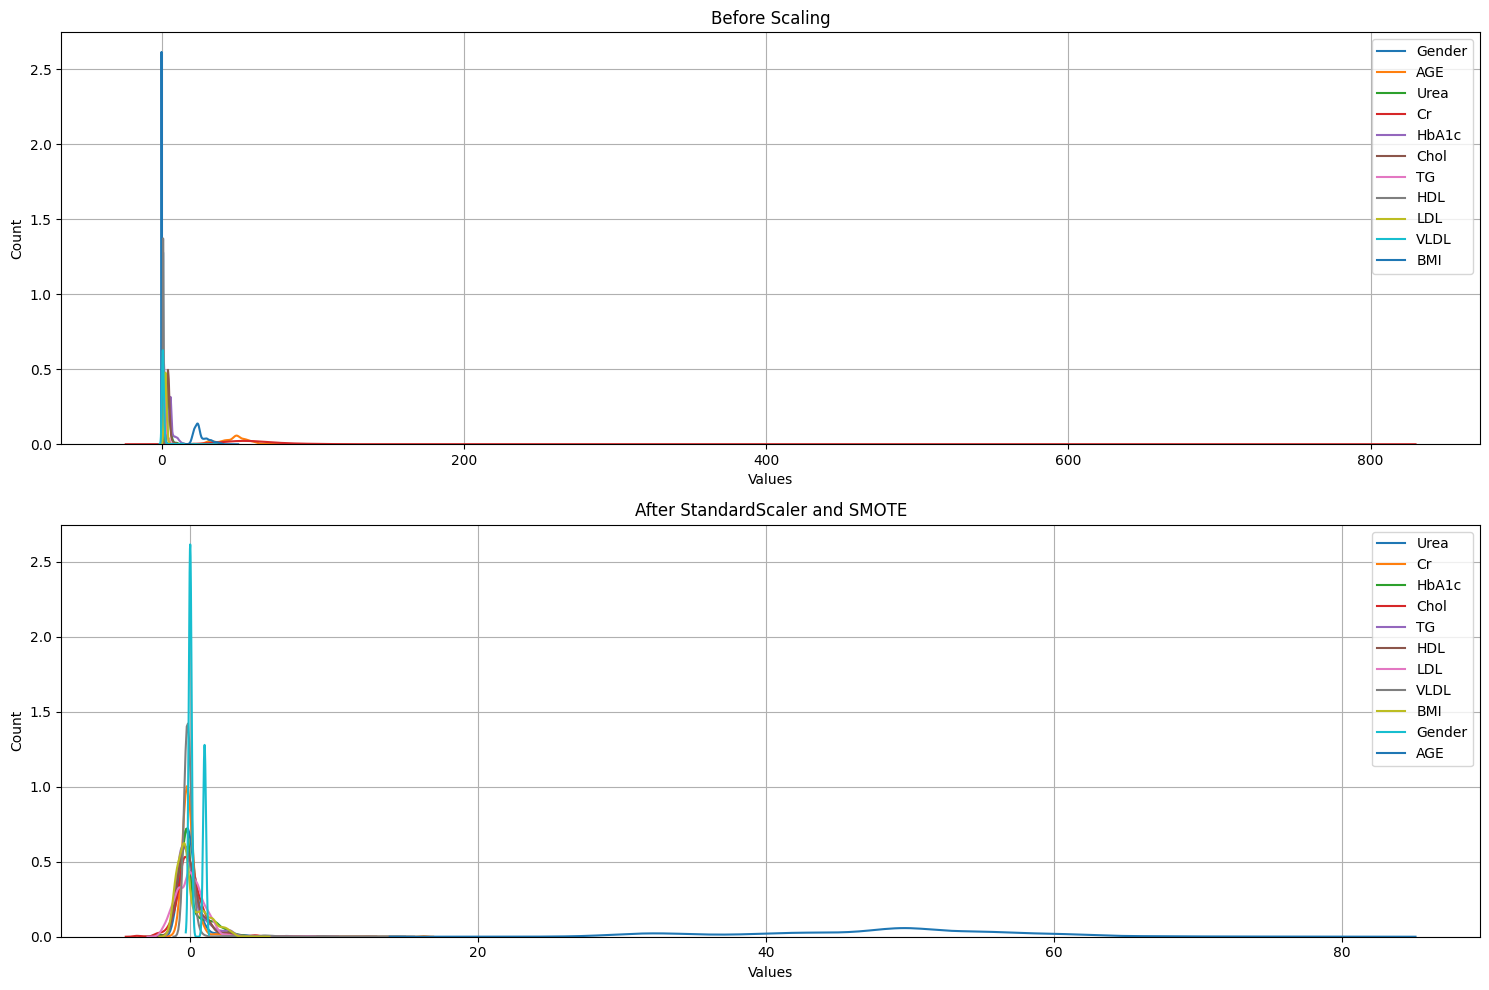

In [30]:
# visualize distribution of each value in each feature after Standard scaling
vizScaling(st_train_smote_le, x_train_smote_le, 'StandardScaler', 'SMOTE')